In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
metadata_Urban = pd.read_excel("CES_Urban_DistributionV2.xlsx", sheet_name="Avg_PUDs_Des")
metadata_Urban["Class"] = metadata_Urban["Class"].str.replace("_", " ")
metadata_Urban = metadata_Urban.rename(columns={"Other areas": "Other NWLs"})
metadata_Urban = metadata_Urban[metadata_Urban["Class"] != "Other"]

In [3]:
metadata_Urban.set_index("Class", inplace=True)
metadata_Urban

,Urban greenspaces,Non-urban greenspaces,State parks,National parks,Protected areas,Other NWLs,Urban greenspaces %,Non-urban greenspaces %,State parks %,National parks %,Protected areas %,Other areas %
Class,,,,,,,,,,,,
Biking,0.185085,0.177083,0.170752,0.166667,0.187590,0.197117,17.069604,16.331681,15.747734,15.370994,17.300686,18.179300
Boating,0.207401,0.188333,0.178512,0.178161,0.222363,0.234872,17.145651,15.569343,14.757399,14.728408,18.382573,19.416626
Camping,0.193350,0.166667,0.206816,0.183806,0.207361,0.252926,15.967095,13.763574,17.079168,15.178977,17.124179,20.887007
Fishing,0.197152,0.166667,0.174525,0.188732,0.216518,0.237675,16.689870,14.109112,14.774374,15.977030,18.329289,20.120324
Hiking,0.182674,0.166667,0.177313,0.174744,0.186011,0.193643,16.897778,15.417078,16.401878,16.164296,17.206520,17.912449
Horseback Riding,0.195187,0.166667,0.173333,0.200000,0.191829,0.212361,17.131041,14.627871,15.212986,17.553445,16.836299,18.638359
Hunting,0.192836,0.000000,0.179784,0.252296,0.195664,0.251147,17.993036,0.000000,16.775167,23.541103,18.256856,23.433839
Shelling,0.230309,0.269444,0.183444,0.193066,0.205086,0.210420,17.828978,20.858548,14.200964,14.945877,15.876364,16.289268
Surfing,0.198451,0.179333,0.180527,0.192837,0.196071,0.199095,17.312115,15.644336,15.748510,16.822305,17.104445,17.368289


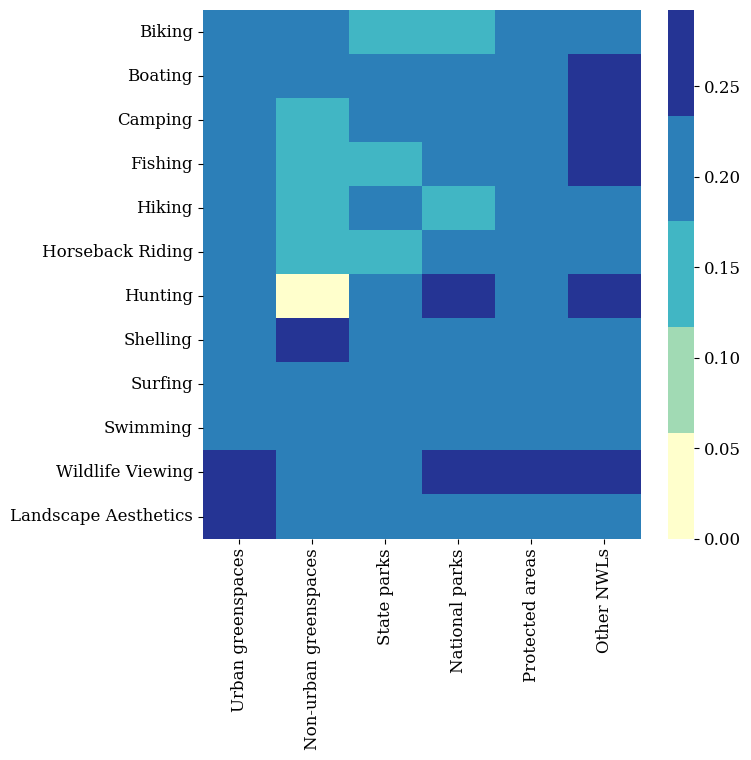

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

# --- Set font globally ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]
plt.rcParams["font.size"] = 20
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# --- Step 1: Build a discrete colormap with your hex list ---
hex_colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
custom_cmap = mcolors.ListedColormap(hex_colors)

# --- Heatmap ---
plt.figure(figsize=(8, 8))
sns.heatmap(
    metadata_Urban.loc[:, "Urban greenspaces":"Other NWLs"],
    annot=False,
    cmap=custom_cmap,
    fmt=".3f"
)
plt.ylabel("")
plt.tight_layout()

# --- Save as TIFF ---
#plt.savefig("Urban_Types.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()


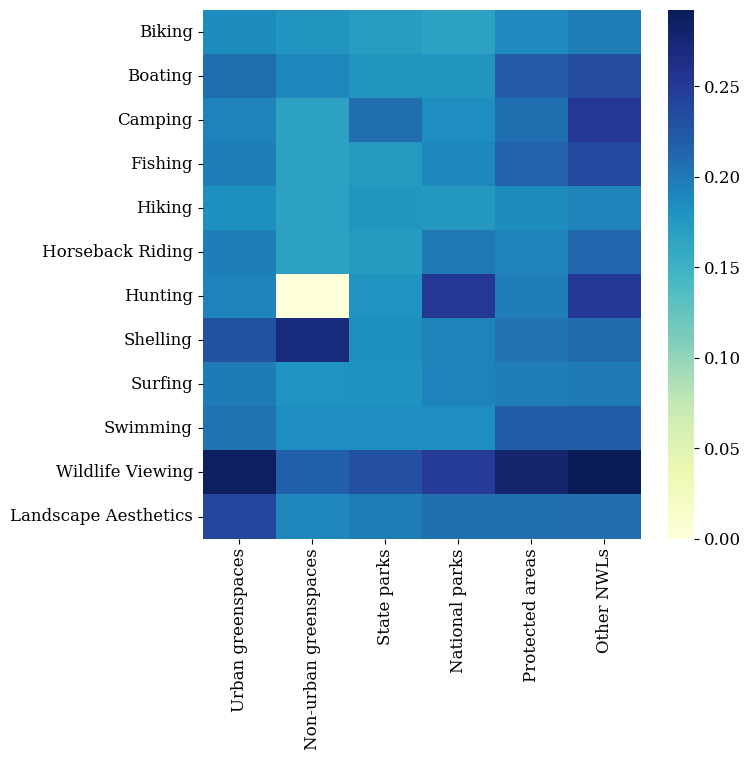

In [9]:
import matplotlib.cm as cm
import numpy as np
# --- Set font globally ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]
plt.rcParams["font.size"] = 20            # Base font size
plt.rcParams["axes.titlesize"] = 16       # Title font size
plt.rcParams["axes.labelsize"] = 16       # Axis label size
plt.rcParams["xtick.labelsize"] = 12      # X tick labels
plt.rcParams["ytick.labelsize"] = 12      # Y tick labels

# --- Step 1: Get full colormap ---
cmap_full = plt.get_cmap('RdBu_r')
cmap_red = mcolors.LinearSegmentedColormap.from_list(
    "RdBu_r_redonly", cmap_full(np.linspace(0, 0.5, 256))
)




plt.figure(figsize=(8, 8))
sns.heatmap(metadata_Urban.loc[:, "Urban greenspaces":"Other NWLs"], annot=False, cmap="YlGnBu", fmt=".3f") #YlGnBu
# plt.title("Heatmap of Activity Preferences by Area Type")
# plt.xlabel("Area Type")
plt.ylabel("")
plt.tight_layout()

# --- Save as TIFF ---
plt.savefig("Urban_Types_YlGnBu.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()

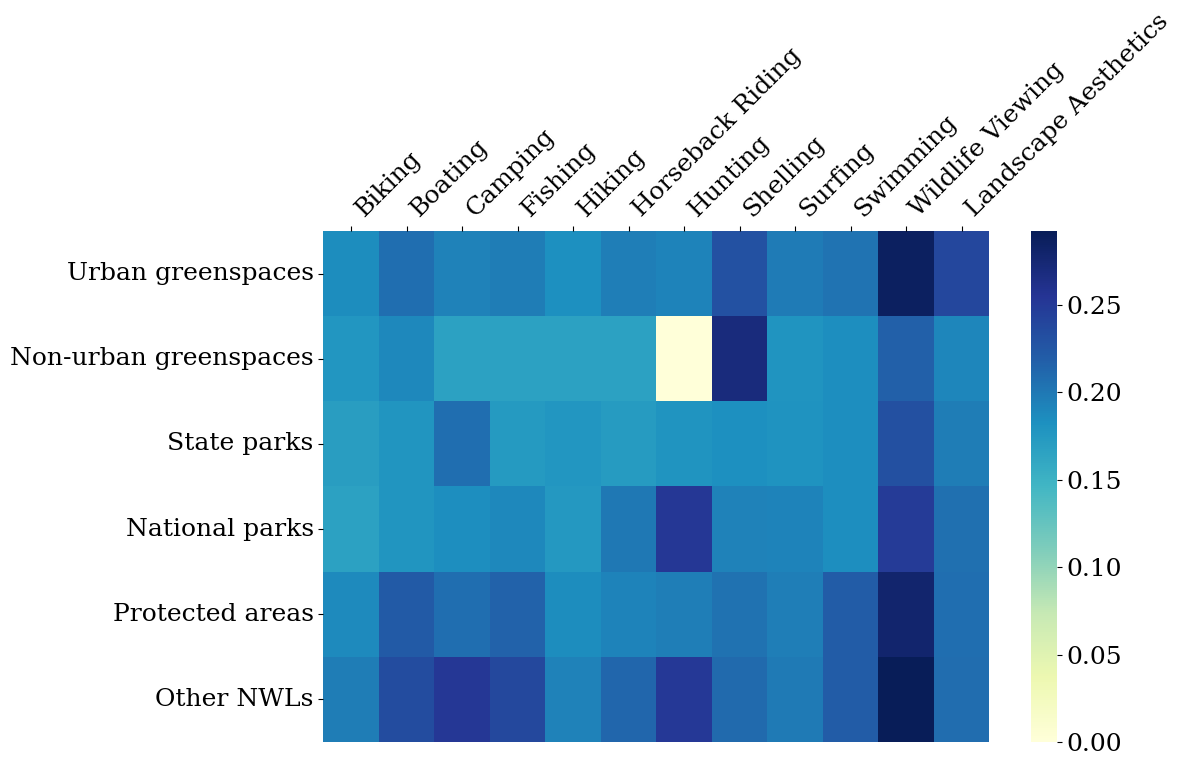

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set font globally ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]
plt.rcParams["font.size"] = 18            # Base font size
plt.rcParams["axes.titlesize"] = 18       # Title font size
plt.rcParams["axes.labelsize"] = 18       # Axis label size
plt.rcParams["xtick.labelsize"] = 18      # X tick labels
plt.rcParams["ytick.labelsize"] = 18      # Y tick labels


plt.figure(figsize=(12, 8))

# 1. transpose the data
rotated = metadata_Urban.loc[:, "Urban greenspaces":"Other NWLs"].T
rotated.index.name = None
rotated.columns.name = None

# 2. draw heatmap (normal orientation after transpose)
ax = sns.heatmap(rotated, cmap="YlGnBu", annot=False)

# 3. Move "old y labels" (land types) to the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")



# 4. Adjust x tick labels (land types)
plt.xticks(rotation=45, ha="left")

# 5. Adjust y tick labels (activities)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("Urban_Types_rotated_layout.tif", dpi=600, bbox_inches="tight")
plt.show()


In [ ]:
import matplotlib.cm as cm
# --- Set font globally ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]
plt.rcParams["font.size"] = 20            # Base font size
plt.rcParams["axes.titlesize"] = 16       # Title font size
plt.rcParams["axes.labelsize"] = 16       # Axis label size
plt.rcParams["xtick.labelsize"] = 12      # X tick labels
plt.rcParams["ytick.labelsize"] = 12      # Y tick labels

# --- Step 1: Get full colormap ---
cmap_full = plt.get_cmap('RdBu_r')
cmap_red = mcolors.LinearSegmentedColormap.from_list(
    "RdBu_r_redonly", cmap_full(np.linspace(0, 0.5, 256))
)


plt.figure(figsize=(8, 8))
sns.heatmap(metadata_Urban.loc[:, "Urban greenspaces":"Other NWLs"], annot=False, cmap="OrRd", fmt=".3f") #YlGnBu
# plt.title("Heatmap of Activity Preferences by Area Type")
# plt.xlabel("Area Type")
plt.ylabel("")
plt.tight_layout()

# --- Save as TIFF ---
plt.savefig("Urban_Types.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()

In [11]:
metadata_NLCD = pd.read_excel("CES_NLCD_percentagesV2.xlsx", sheet_name="Avg_PUDs_Des")
metadata_NLCD.columns = metadata_NLCD.columns.str.replace('_count', '', regex=False)

In [12]:
metadata_NLCD = metadata_NLCD.rename(columns={"Unnamed: 0": "Class"})
metadata_NLCD["Class"] = metadata_NLCD["Class"].str.replace("_", " ")
metadata_NLCD = metadata_NLCD[metadata_NLCD["Class"] != "Other"]
metadata_NLCD.set_index("Class", inplace=True)

In [13]:
metadata_NLCD

,Developed,Wetlands,Water,Pasture/Hay,Barren,Forest,Cultivated Crops,Herbaceous,Shrubland,Developed_percentage,Wetlands_percentage,Water_percentage,Pasture/Hay_percentage,Barren_percentage,Forest_percentage,Cultivated Crops_percentage,Herbaceous_percentage,Shrubland_percentage
Class,,,,,,,,,,,,,,,,,,
Biking,0.182870,0.171843,0.189236,0.182927,0.167094,0.180380,0.500000,0.166667,0.166667,9.59,9.01,9.92,9.59,8.76,9.46,26.21,8.74,8.74
Boating,0.209255,0.190691,0.202988,0.245098,0.209657,0.170833,0.833333,0.153846,0.166667,8.78,8.00,8.52,10.29,8.80,7.17,34.98,6.46,7.00
Camping,0.194646,0.196549,0.170455,0.257092,0.186508,0.185275,2.866667,0.180556,0.166667,4.42,4.46,3.87,5.84,4.23,4.21,65.09,4.10,3.78
Fishing,0.196182,0.198251,0.192318,0.204762,0.190157,0.171581,2.900000,0.166667,0.145833,4.49,4.54,4.41,4.69,4.36,3.93,66.43,3.82,3.34
Hiking,0.178229,0.180566,0.163842,0.179878,0.172331,0.177605,0.472222,0.177083,0.150794,9.62,9.75,8.84,9.71,9.30,9.59,25.49,9.56,8.14
Horseback Riding,0.189918,0.180912,0.152778,0.196272,0.166667,0.171296,0.952381,0.166667,0.166667,8.10,7.72,6.52,8.37,7.11,7.31,40.64,7.11,7.11
Hunting,0.192632,0.194682,0.226950,0.192529,0.177305,0.177215,1.530303,0.133333,0.166667,6.44,6.51,7.59,6.44,5.93,5.92,51.15,4.46,5.57
Shelling,0.224449,0.183193,0.181587,0.174330,0.195993,0.169753,0.398810,0.150000,0.145833,12.31,10.04,9.96,9.56,10.75,9.31,21.87,8.22,8.00
Surfing,0.195129,0.178788,0.196560,0.243590,0.197234,0.181159,0.500000,0.250000,0.166667,9.25,8.48,9.32,11.55,9.35,8.59,23.71,11.85,7.90


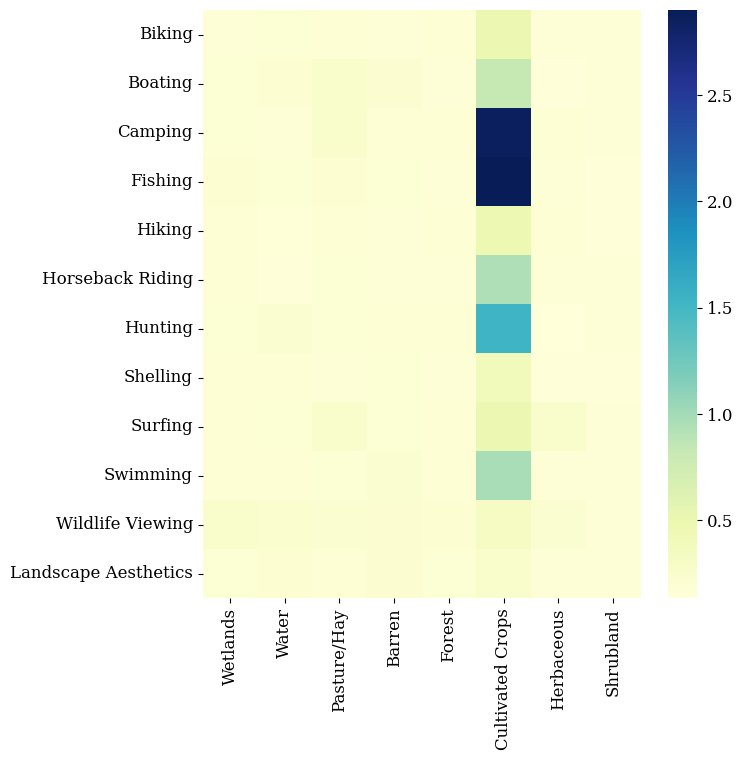

In [117]:
# --- Set font globally ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]
plt.rcParams["font.size"] = 20            # Base font size
plt.rcParams["axes.titlesize"] = 16       # Title font size
plt.rcParams["axes.labelsize"] = 16       # Axis label size
plt.rcParams["xtick.labelsize"] = 12      # X tick labels
plt.rcParams["ytick.labelsize"] = 12      # Y tick labels

plt.figure(figsize=(8, 8))
sns.heatmap(metadata_NLCD.loc[:, "Wetlands":"Shrubland"], annot=False, cmap="YlGnBu", fmt=".3f")
# plt.title("Heatmap of Activity Preferences by Area Type")
# plt.xlabel("Area Type")
plt.ylabel("")
plt.tight_layout()

# --- Save as TIFF ---
plt.savefig("NLCD_Types.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()

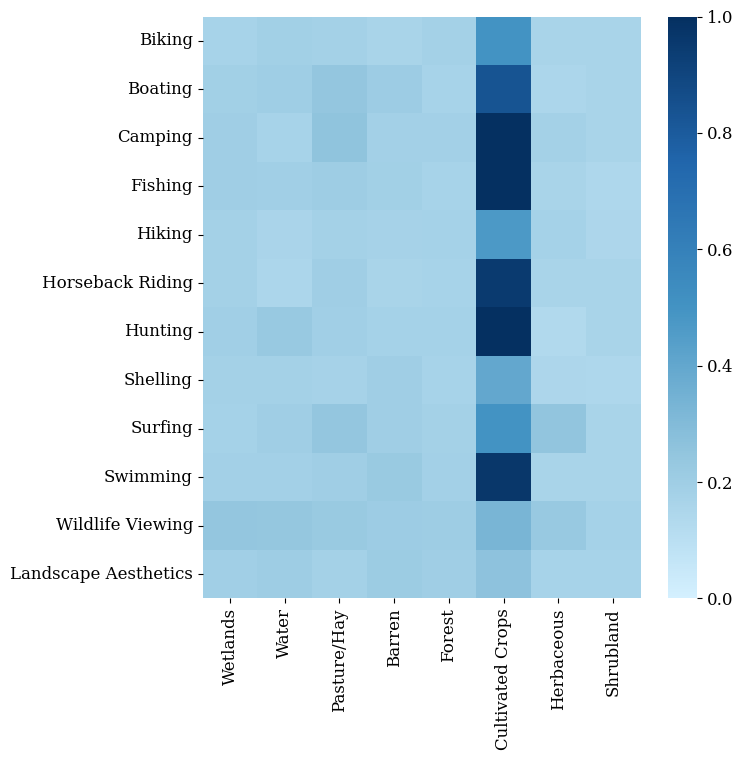

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Define colors and normalized positions (MUST go from 0.0 to 1.0)
colors = ["#d4f0ff", "#92c5de", "#4393c3", "#2166ac", "#053061"]
positions = [0.0, 0.25, 0.5, 0.75, 1.0]  # normalized 0–1 scale
#positions = [0.0, 0.05, 0.10, 0.15, 1.0]  # normalized 0–1 scale


# Create smooth continuous colormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", list(zip(positions, colors)))

# --- Font setup (optional) ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]
plt.rcParams["font.size"] = 20
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# --- Plot heatmap ---
plt.figure(figsize=(8, 8))
sns.heatmap(
    metadata_NLCD.loc[:, "Wetlands":"Shrubland"],
    cmap=cmap,
    vmin=0, vmax=1,   # Ensure full scale 0–1
    annot=False,
    fmt=".3f"#,
    #cbar_kws={'label': 'Value'}
)

plt.ylabel("")
plt.tight_layout()

# --- Save before showing ---
plt.savefig("NLCD_Types.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()


# Radar Chart

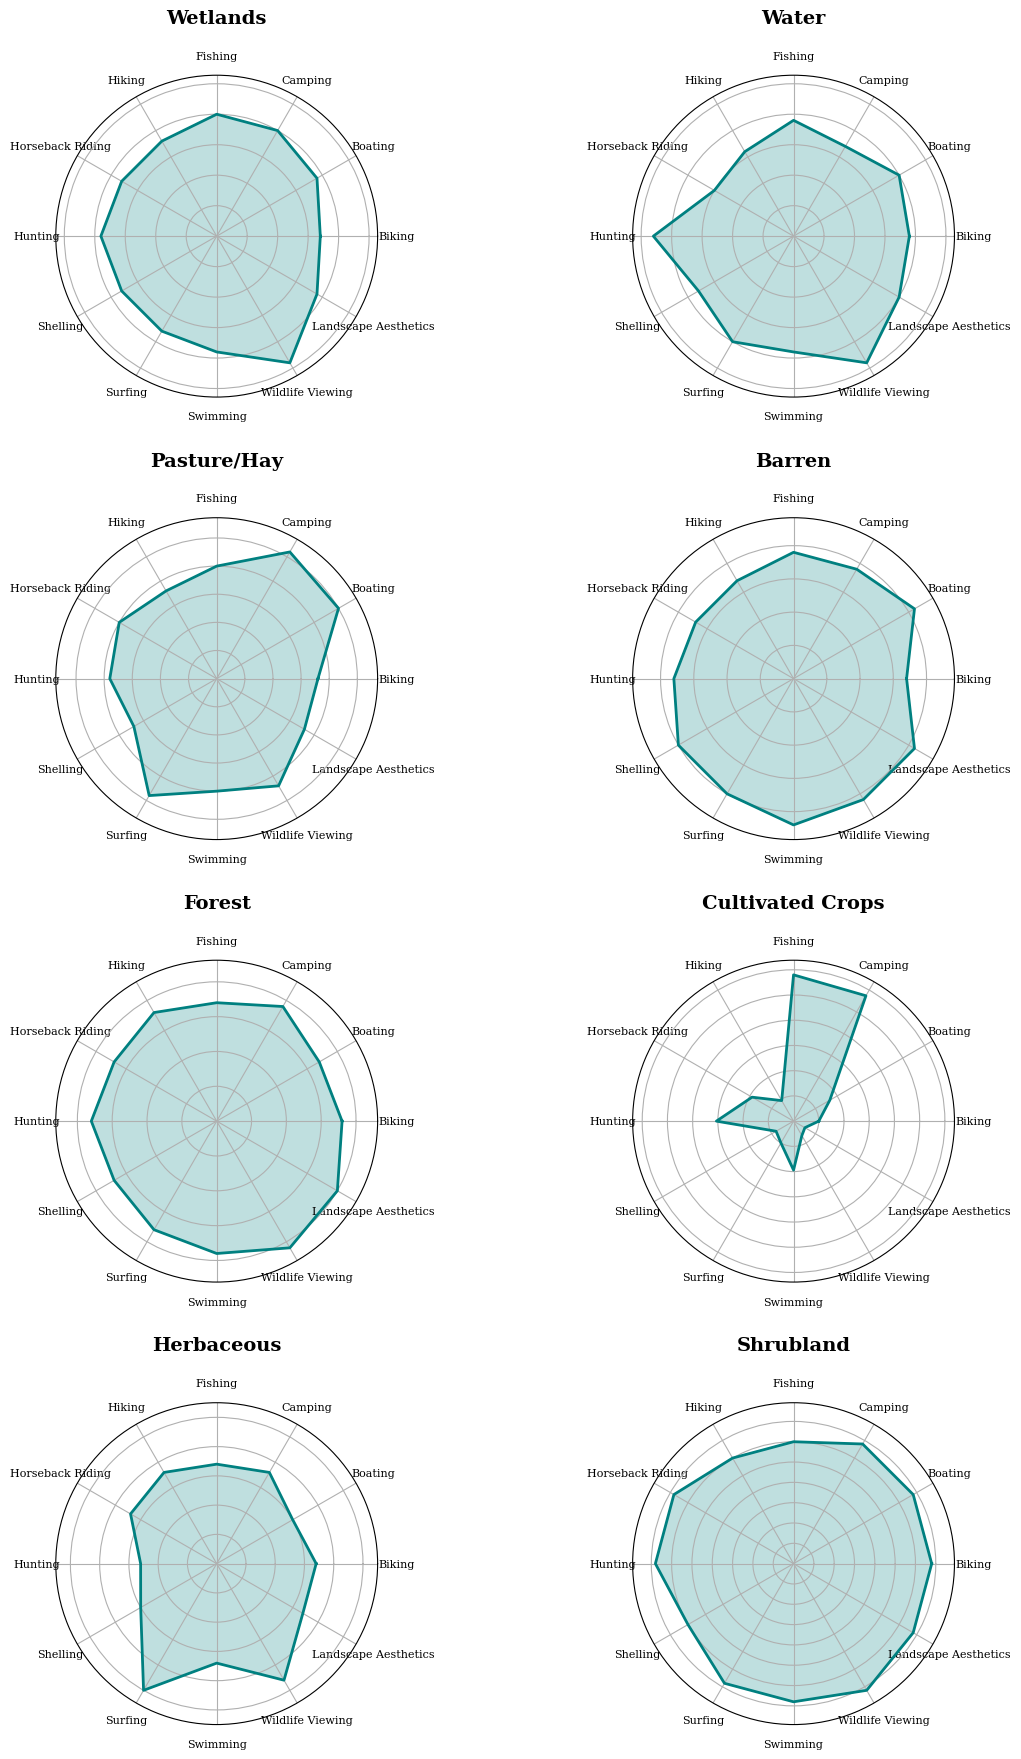

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Example data ===
data = {
    "Class": [
        "Biking", "Boating", "Camping", "Fishing", "Hiking",
        "Horseback Riding", "Hunting", "Shelling", "Surfing",
        "Swimming", "Wildlife Viewing", "Landscape Aesthetics"
    ],
    "Wetlands": [0.17, 0.19, 0.20, 0.20, 0.18, 0.18, 0.19, 0.18, 0.18, 0.19, 0.24, 0.19],
    "Water": [0.19, 0.20, 0.17, 0.19, 0.16, 0.15, 0.23, 0.18, 0.20, 0.19, 0.24, 0.20],
    "Pasture/Hay": [0.18, 0.25, 0.26, 0.20, 0.18, 0.20, 0.19, 0.17, 0.24, 0.20, 0.22, 0.18],
    "Barren": [0.17, 0.21, 0.19, 0.19, 0.17, 0.17, 0.18, 0.20, 0.20, 0.22, 0.21, 0.21],
    "Forest": [0.18, 0.17, 0.19, 0.17, 0.18, 0.17, 0.18, 0.17, 0.18, 0.19, 0.21, 0.20],
    "Cultivated Crops": [0.50, 0.83, 2.87, 2.90, 0.47, 0.95, 1.53, 0.40, 0.50, 0.97, 0.33, 0.26],
    "Herbaceous": [0.17, 0.15, 0.18, 0.17, 0.18, 0.17, 0.13, 0.15, 0.25, 0.17, 0.23, 0.17],
    "Shrubland": [0.17, 0.17, 0.17, 0.15, 0.15, 0.17, 0.17, 0.15, 0.17, 0.17, 0.18, 0.17],
}
df = pd.DataFrame(data)
df.set_index("Class", inplace=True)

# === Radar chart setup ===
labels = df.index.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# === Create figure with 4 rows × 2 columns ===
fig, axes = plt.subplots(4, 2, figsize=(12, 18), subplot_kw=dict(polar=True))
axes = axes.flatten()

# === Global font setup (optional) ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

# === Loop through each column and subplot ===
for i, col in enumerate(df.columns):
    ax = axes[i]
    values = df[col].tolist()
    values += values[:1]  # close the loop

    # Plot radar chart
    ax.plot(angles, values, color="teal", linewidth=2)
    ax.fill(angles, values, color="teal", alpha=0.25)

    # Labels and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)
    ax.set_title(col, fontsize=14, fontweight='bold', pad=20)
    ax.set_ylim(0, df[col].max() * 1.1)
    ax.set_yticklabels([])  # hide radial tick labels for cleaner look

# === Remove any unused subplots (if fewer than 8) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig("Radar_8plots.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()


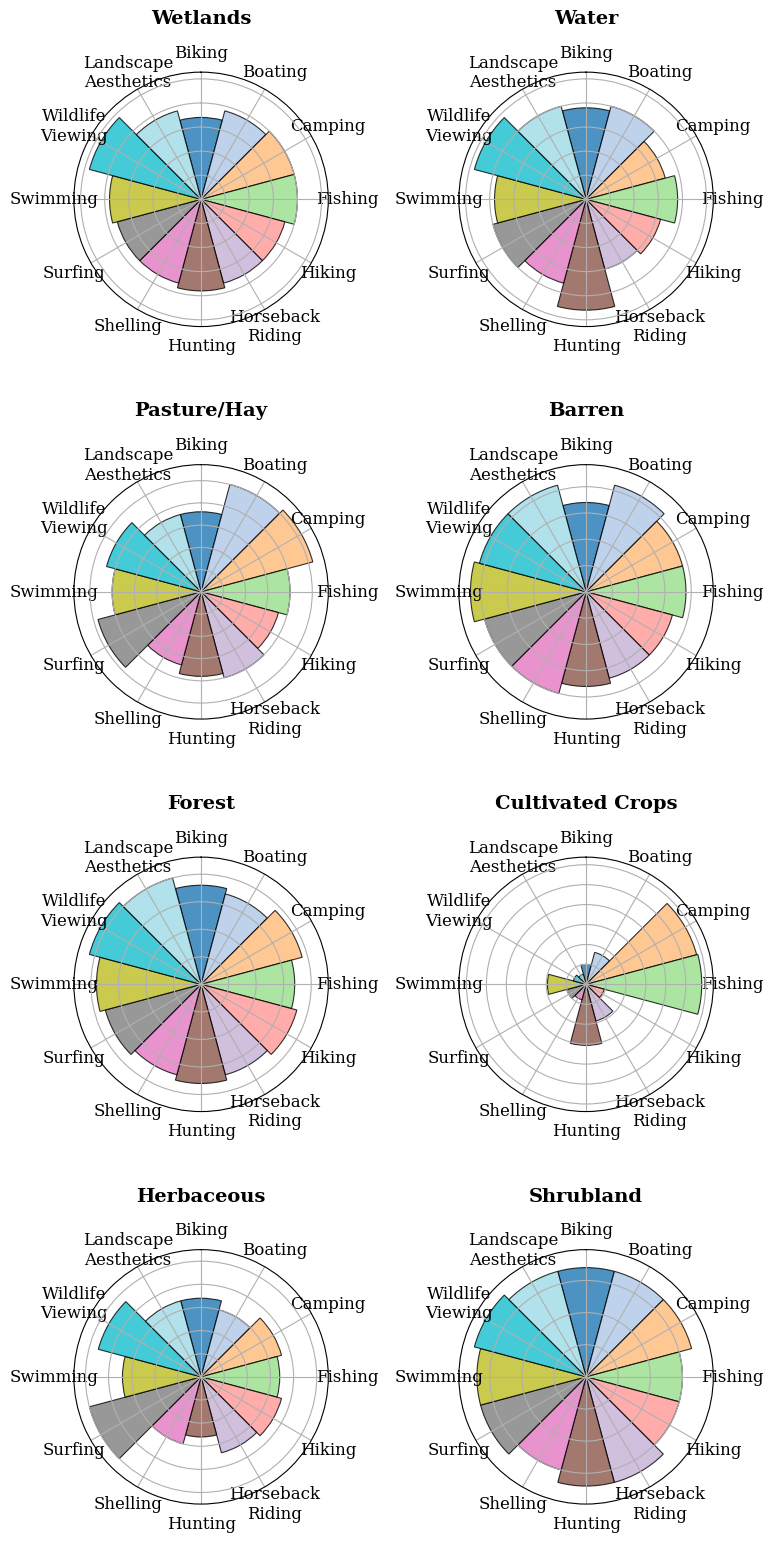

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Prepare your dataset ===
data = metadata_NLCD.loc[:, "Wetlands":"Shrubland"]

# === 2. Choose which columns to plot ===
cols = ["Wetlands", "Water", "Pasture/Hay", "Barren",
        "Forest", "Cultivated Crops", "Herbaceous", "Shrubland"]

# === 3. Font setup (optional) ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

# === 4. Create 2-column × 4-row figure ===
fig, axes = plt.subplots(4, 2, figsize=(8, 16), subplot_kw=dict(polar=True))
axes = axes.flatten()

# === 5. Loop through each land-cover type ===
for i, col in enumerate(cols):
    ax = axes[i]

    # Values and angles
    values = df[col].values
    N = len(values)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # Color each bar by height (optional)
    colors = plt.cm.viridis(values / values.max())
    colors = plt.cm.tab10(np.linspace(0, 1, len(cols)))  # 8-color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 12))
    
    # Draw bars
    bars = ax.bar(angles, values,
                  width=2 * np.pi / N,
                  color=colors, #colors,
                  alpha=0.8,
                  edgecolor="black",
                  linewidth=0.8)

    


    # Label setup
    ax.set_xticks(angles)
    
    import textwrap
    # wrap each label to two lines max (break long words automatically)
    wrapped_labels = [textwrap.fill(label, width=10) for label in df.index]
    ax.set_xticklabels(wrapped_labels, fontsize=12)
    
    # --- Compute key radial values ---
    min_val = 0
    med_val = np.median(values)
    max_val = values.max()
    
    # #ax.set_xticklabels(df.index, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(col, fontsize=14, fontweight='bold', pad=15)
    
    # --- Set radial (y-axis) ticks ---
    # ax.set_yticks([min_val, med_val, max_val])
    # ax.set_yticklabels([f"{min_val:.2f}", f"{med_val:.2f}", f"{max_val:.2f}"], fontsize=8)
    # ax.set_ylim(0, max_val * 1.1)
    # ax.set_rlabel_position(90)  # position of the radial labels (top)

    # Make top start and clockwise
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Set radial limit to slightly above max
    ax.set_ylim(0, df[col].max() * 1.1)

# === 6. Remove any unused axes (if fewer than 8) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === 7. Global title and layout ===
#fig.suptitle("Polar Bar Charts by Land Cover Type", fontsize=18, fontweight="bold", y=1.03)
plt.tight_layout()

# === 8. Save high-resolution output ===
#plt.savefig("Polar_Bar_8plots.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()


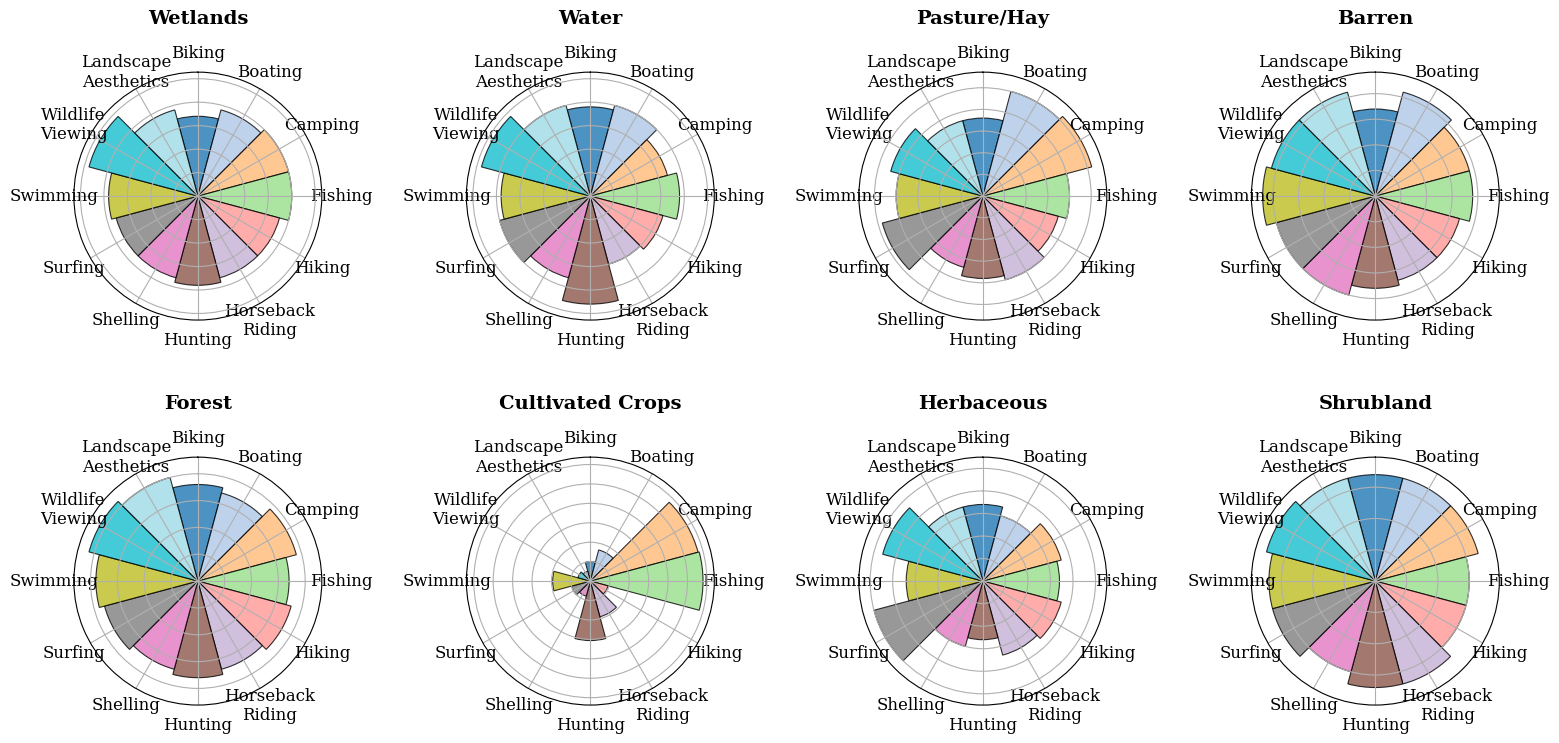

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Prepare your dataset ===
data = metadata_NLCD.loc[:, "Wetlands":"Shrubland"]

# === 2. Choose which columns to plot ===
cols = ["Wetlands", "Water", "Pasture/Hay", "Barren",
        "Forest", "Cultivated Crops", "Herbaceous", "Shrubland"]

# === 3. Font setup (optional) ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

# === 4. Create 2-column × 4-row figure ===
# fig, axes = plt.subplots(4, 2, figsize=(8, 16), subplot_kw=dict(polar=True))
fig, axes = plt.subplots(2, 4, figsize=(16, 8), subplot_kw=dict(polar=True))

axes = axes.flatten()

# === 5. Loop through each land-cover type ===
for i, col in enumerate(cols):
    ax = axes[i]

    # Values and angles
    values = df[col].values
    N = len(values)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # Color each bar by height (optional)
    colors = plt.cm.viridis(values / values.max())
    colors = plt.cm.tab10(np.linspace(0, 1, len(cols)))  # 8-color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 12))
    
    # Draw bars
    bars = ax.bar(angles, values,
                  width=2 * np.pi / N,
                  color=colors, #colors,
                  alpha=0.8,
                  edgecolor="black",
                  linewidth=0.8)

    


    # Label setup
    ax.set_xticks(angles)
    
    import textwrap
    # wrap each label to two lines max (break long words automatically)
    wrapped_labels = [textwrap.fill(label, width=10) for label in df.index]
    ax.set_xticklabels(wrapped_labels, fontsize=12)
    
    # --- Compute key radial values ---
    min_val = 0
    med_val = np.median(values)
    max_val = values.max()
    
    # #ax.set_xticklabels(df.index, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(col, fontsize=14, fontweight='bold', pad=15)
    
    # --- Set radial (y-axis) ticks ---
    # ax.set_yticks([min_val, med_val, max_val])
    # ax.set_yticklabels([f"{min_val:.2f}", f"{med_val:.2f}", f"{max_val:.2f}"], fontsize=8)
    # ax.set_ylim(0, max_val * 1.1)
    # ax.set_rlabel_position(90)  # position of the radial labels (top)

    # Make top start and clockwise
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Set radial limit to slightly above max
    ax.set_ylim(0, df[col].max() * 1.1)

# === 6. Remove any unused axes (if fewer than 8) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === 7. Global title and layout ===
#fig.suptitle("Polar Bar Charts by Land Cover Type", fontsize=18, fontweight="bold", y=1.03)
plt.tight_layout()

# === 8. Save high-resolution output ===
#plt.savefig("Polar_Bar_8plots.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()


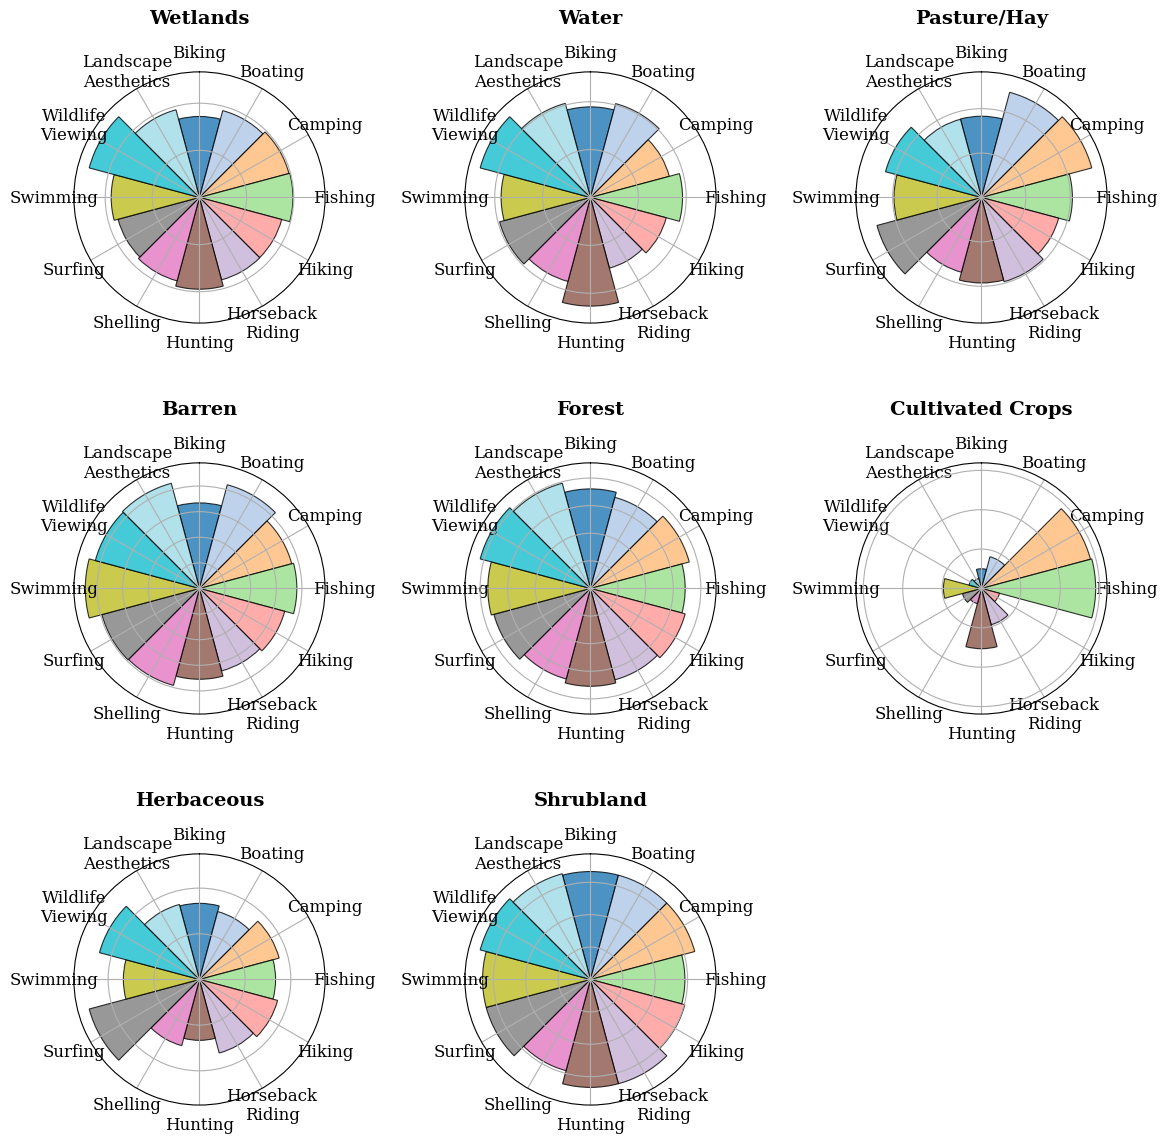

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Prepare your dataset ===
data = metadata_NLCD.loc[:, "Wetlands":"Shrubland"]

# === 2. Choose which columns to plot ===
cols = ["Wetlands", "Water", "Pasture/Hay", "Barren",
        "Forest", "Cultivated Crops", "Herbaceous", "Shrubland"]

# === 3. Font setup (optional) ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

# === 4. Create 2-column × 4-row figure ===
# fig, axes = plt.subplots(4, 2, figsize=(8, 16), subplot_kw=dict(polar=True))
fig, axes = plt.subplots(3, 3, figsize=(12, 12), subplot_kw=dict(polar=True))


axes = axes.flatten()

# === 5. Loop through each land-cover type ===
for i, col in enumerate(cols):
    ax = axes[i]

    # Values and angles
    values = data[col].values
    N = len(values)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # Color each bar by height (optional)
    colors = plt.cm.viridis(values / values.max())
    colors = plt.cm.tab10(np.linspace(0, 1, len(cols)))  # 8-color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 12))
    
    # Draw bars
    bars = ax.bar(angles, values,
                  width=2 * np.pi / N,
                  color=colors, #colors,
                  alpha=0.8,
                  edgecolor="black",
                  linewidth=0.8)

    


    # Label setup
    ax.set_xticks(angles)
    
    import textwrap
    # wrap each label to two lines max (break long words automatically)
    wrapped_labels = [textwrap.fill(label, width=10) for label in data.index]
    ax.set_xticklabels(wrapped_labels, fontsize=12)
    
    # --- Compute key radial values ---
    min_val = 0
    med_val = np.median(values)
    max_val = values.max()
    
    # #ax.set_xticklabels(df.index, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(col, fontsize=14, fontweight='bold', pad=15)
    
    # --- Set radial (y-axis) ticks ---
    # ax.set_yticks([min_val, med_val, max_val])
    # ax.set_yticklabels([f"{min_val:.2f}", f"{med_val:.2f}", f"{max_val:.2f}"], fontsize=8)
    # ax.set_ylim(0, max_val * 1.1)
    # ax.set_rlabel_position(90)  # position of the radial labels (top)

    # Make top start and clockwise
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Set radial limit to slightly above max
    ax.set_ylim(0, data[col].max() * 1.1)

# === 6. Remove any unused axes (if fewer than 8) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === 7. Global title and layout ===
#fig.suptitle("Polar Bar Charts by Land Cover Type", fontsize=18, fontweight="bold", y=1.03)
plt.tight_layout()

# === 8. Save high-resolution output ===
#plt.savefig("NLCD_Types_3by3.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()


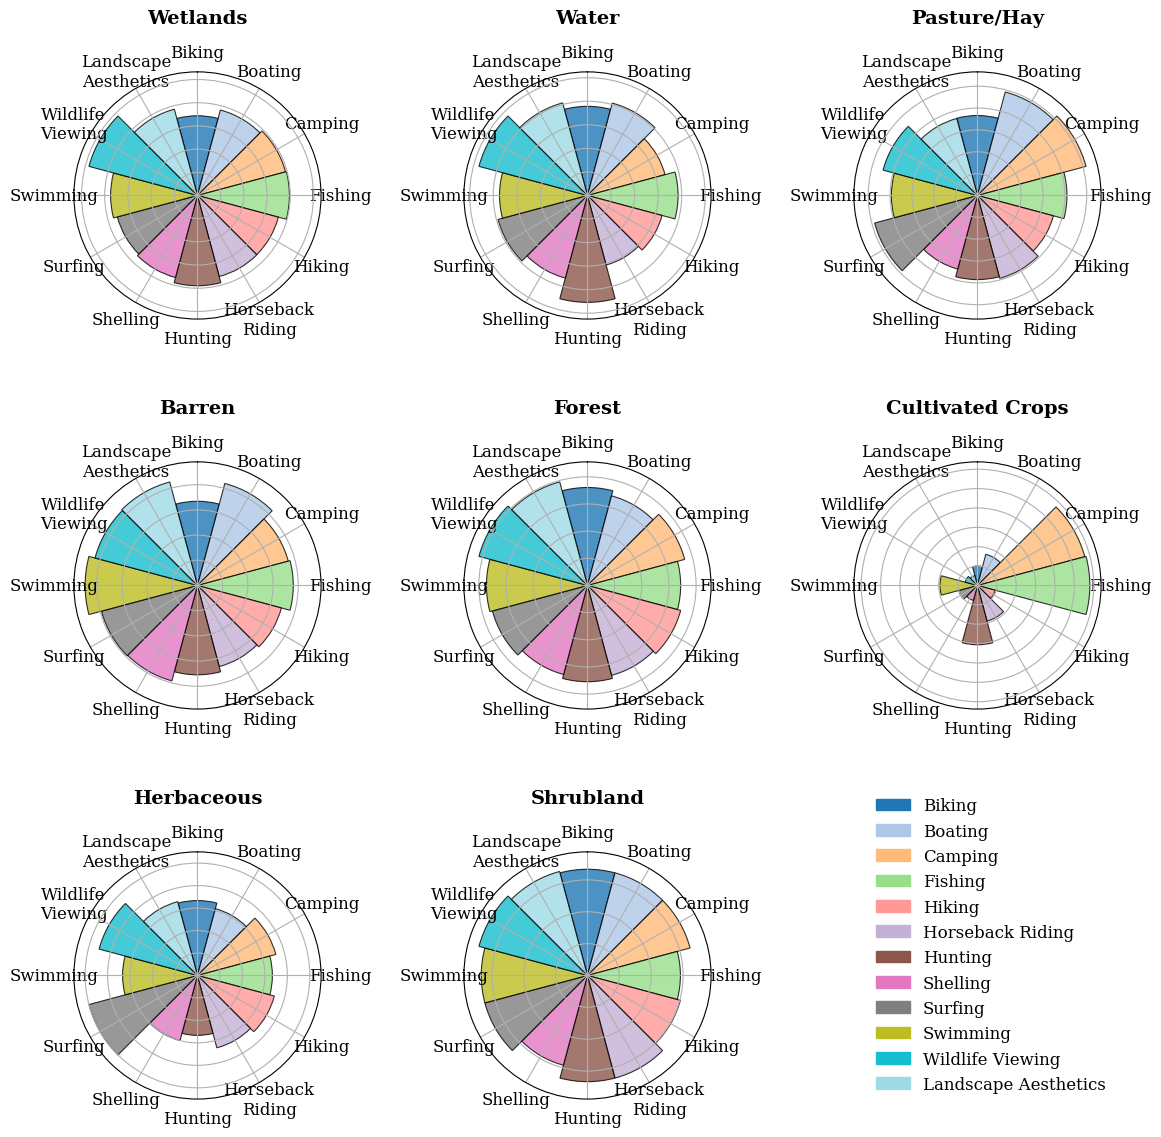

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Prepare your dataset ===
data = metadata_NLCD.loc[:, "Wetlands":"Shrubland"]

# === 2. Choose which columns to plot ===
cols = ["Wetlands", "Water", "Pasture/Hay", "Barren",
        "Forest", "Cultivated Crops", "Herbaceous", "Shrubland"]

# === 3. Font setup (optional) ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

# === 4. Create 2-column × 4-row figure ===
# fig, axes = plt.subplots(4, 2, figsize=(8, 16), subplot_kw=dict(polar=True))
fig, axes = plt.subplots(3, 3, figsize=(12, 12), subplot_kw=dict(polar=True))


axes = axes.flatten()

# === 5. Loop through each land-cover type ===
for i, col in enumerate(cols):
    ax = axes[i]

    # Values and angles
    values = data[col].values
    N = len(values)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # Color each bar by height (optional)
    colors = plt.cm.viridis(values / values.max())
    colors = plt.cm.tab10(np.linspace(0, 1, len(cols)))  # 8-color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 12))
    
    # Draw bars
    bars = ax.bar(angles, values,
                  width=2 * np.pi / N,
                  color=colors, #colors,
                  alpha=0.8,
                  edgecolor="black",
                  linewidth=0.8)

    


    # Label setup
    ax.set_xticks(angles)
    
    import textwrap
    # wrap each label to two lines max (break long words automatically)
    wrapped_labels = [textwrap.fill(label, width=10) for label in data.index]
    ax.set_xticklabels(wrapped_labels, fontsize=12)
    
    # --- Compute key radial values ---
    min_val = 0
    med_val = np.median(values)
    max_val = values.max()
    
    # #ax.set_xticklabels(df.index, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(col, fontsize=14, fontweight='bold', pad=15)
    
    # --- Set radial (y-axis) ticks ---
    # ax.set_yticks([min_val, med_val, max_val])
    # ax.set_yticklabels([f"{min_val:.2f}", f"{med_val:.2f}", f"{max_val:.2f}"], fontsize=8)
    # ax.set_ylim(0, max_val * 1.1)
    # ax.set_rlabel_position(90)  # position of the radial labels (top)

    # Make top start and clockwise
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Set radial limit to slightly above max
    ax.set_ylim(0, data[col].max() * 1.1)

# === 6. Remove any unused axes (if fewer than 8) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === 7. Global title and layout ===
#fig.suptitle("Polar Bar Charts by Land Cover Type", fontsize=18, fontweight="bold", y=1.03)
plt.tight_layout()

# === Legend ===
import matplotlib.patches as mpatches

activity_labels = list(data.index)
color_palette = plt.cm.tab20(np.linspace(0, 1, len(activity_labels)))

patches = [mpatches.Patch(color=color_palette[i], label=activity_labels[i])
           for i in range(len(activity_labels))]

fig.legend(
    handles=patches,
    loc="lower right",
    #bbox_to_anchor=(0.98, 0.02),
    bbox_to_anchor=(0.95, 0.05),  # (x=center, y=small offset from bottom)
    fontsize=12,
    #title="Activities",
    title_fontsize=12,
    ncol=1,
    frameon=False
)

plt.savefig("NLCD_Types_3by3_wuthLegend.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()



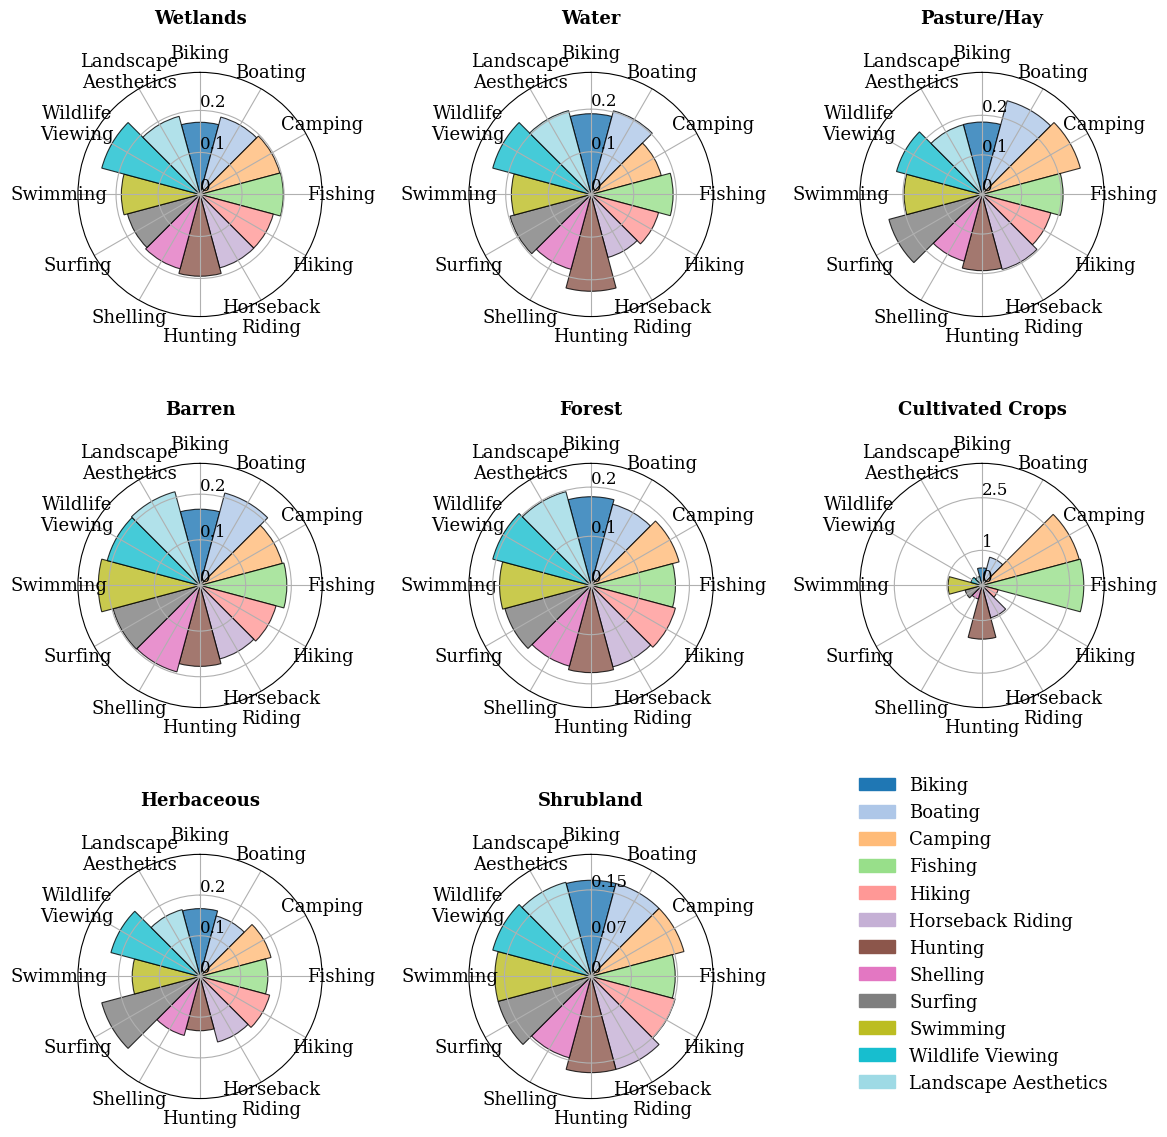

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Prepare your dataset ===
data = metadata_NLCD.loc[:, "Wetlands":"Shrubland"]

# === 2. Choose which columns to plot ===
cols = ["Wetlands", "Water", "Pasture/Hay", "Barren",
        "Forest", "Cultivated Crops", "Herbaceous", "Shrubland"]

# === 3. Font setup (optional) ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

# === 4. Create 2-column × 4-row figure ===
# fig, axes = plt.subplots(4, 2, figsize=(8, 16), subplot_kw=dict(polar=True))
fig, axes = plt.subplots(3, 3, figsize=(12, 12), subplot_kw=dict(polar=True))


axes = axes.flatten()

# === 5. Loop through each land-cover type ===
for i, col in enumerate(cols):
    ax = axes[i]

    # Values and angles
    values = data[col].values
    N = len(values)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # Color each bar by height (optional)
    colors = plt.cm.viridis(values / values.max())
    colors = plt.cm.tab10(np.linspace(0, 1, len(cols)))  # 8-color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 12))
    
    # Draw bars
    bars = ax.bar(angles, values,
                  width=2 * np.pi / N,
                  color=colors, #colors,
                  alpha=0.8,
                  edgecolor="black",
                  linewidth=0.8)

    


    # Label setup
    ax.set_xticks(angles)
    
    import textwrap
    # wrap each label to two lines max (break long words automatically)
    wrapped_labels = [textwrap.fill(label, width=10) for label in data.index]
    ax.set_xticklabels(wrapped_labels, fontsize=13)
    
    # --- Compute key radial values ---
    min_val = 0
    med_val = np.median(values)
    max_val = values.max()
    
    # #ax.set_xticklabels(df.index, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(col, fontsize=13, fontweight='bold', pad=15)
    
    # --- Set radial (y-axis) ticks ---
    ax.set_ylim(0, 3)                          # max radial value = 3
    if col == 'Cultivated Crops':
        ax.set_yticks([0, 1, 2.5])                 # fixed ticks
        ax.set_yticklabels(["0", "1", "2.5"], fontsize=12)
    elif col == 'Shrubland':
        ax.set_yticks([0, 0.07, 0.15])                 # fixed ticks
        ax.set_yticklabels(["0", "0.07", "0.15"], fontsize=12)
    else:
        ax.set_yticks([0, 0.1, 0.2])                 # fixed ticks
        ax.set_yticklabels(["0", "0.1", "0.2"], fontsize=12)       
    ax.set_rlabel_position(0)                 # optional (put labels at top)
    # ax.set_yticks([min_val, med_val, max_val])
    # ax.set_yticklabels([f"{min_val:.2f}", f"{med_val:.2f}", f"{max_val:.2f}"], fontsize=8)
    # ax.set_ylim(0, max_val * 1.1)
    # ax.set_rlabel_position(90)  # position of the radial labels (top)

    # Make top start and clockwise
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Set radial limit to slightly above max
    ax.set_ylim(0, data[col].max() * 1.2)

# === 6. Remove any unused axes (if fewer than 8) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === 7. Global title and layout ===
#fig.suptitle("Polar Bar Charts by Land Cover Type", fontsize=18, fontweight="bold", y=1.03)
plt.tight_layout()

# === Legend ===
import matplotlib.patches as mpatches

activity_labels = list(data.index)
color_palette = plt.cm.tab20(np.linspace(0, 1, len(activity_labels)))

patches = [mpatches.Patch(color=color_palette[i], label=activity_labels[i])
           for i in range(len(activity_labels))]

fig.legend(
    handles=patches,
    loc="lower right",
    #bbox_to_anchor=(0.98, 0.02),
    bbox_to_anchor=(0.95, 0.05),  # (x=center, y=small offset from bottom)
    fontsize=13,
    #title="Activities",
    title_fontsize=13,
    ncol=1,
    frameon=False
)

plt.savefig("NLCD_Types_3by3_wuthLegend.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()



# Normalization Figures

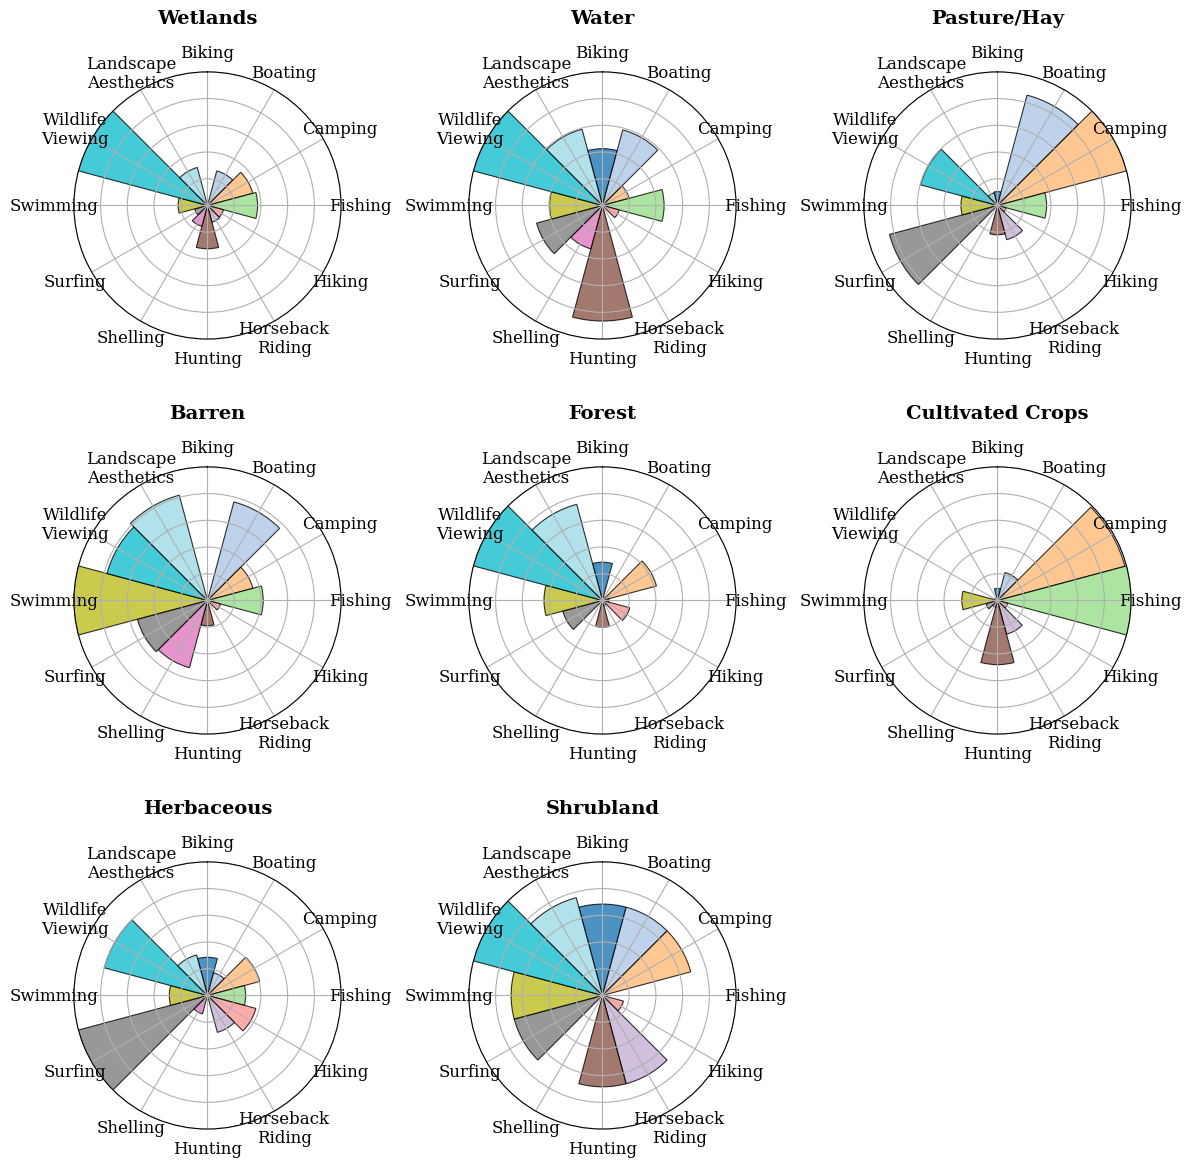

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# === 1. Prepare your dataset ===
data = metadata_NLCD.loc[:, "Wetlands":"Shrubland"]

# Apply MinMax normalization
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


# === 2. Choose which columns to plot ===
cols = ["Wetlands", "Water", "Pasture/Hay", "Barren",
        "Forest", "Cultivated Crops", "Herbaceous", "Shrubland"]

# === 3. Font setup (optional) ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

# === 4. Create 2-column × 4-row figure ===
# fig, axes = plt.subplots(4, 2, figsize=(8, 16), subplot_kw=dict(polar=True))
fig, axes = plt.subplots(3, 3, figsize=(12, 12), subplot_kw=dict(polar=True))


axes = axes.flatten()

# === 5. Loop through each land-cover type ===
for i, col in enumerate(cols):
    ax = axes[i]

    # Values and angles
    values = normalized_data[col].values
    N = len(values)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # Color each bar by height (optional)
    colors = plt.cm.viridis(values / values.max())
    colors = plt.cm.tab10(np.linspace(0, 1, len(cols)))  # 8-color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 12))
    
    # Draw bars
    bars = ax.bar(angles, values,
                  width=2 * np.pi / N,
                  color=colors, #colors,
                  alpha=0.8,
                  edgecolor="black",
                  linewidth=0.8)

    


    # Label setup
    ax.set_xticks(angles)
    
    import textwrap
    # wrap each label to two lines max (break long words automatically)
    wrapped_labels = [textwrap.fill(label, width=10) for label in data.index]
    ax.set_xticklabels(wrapped_labels, fontsize=12)
    
    # --- Compute key radial values ---
    min_val = 0
    med_val = np.median(values)
    max_val = values.max()
    
    # #ax.set_xticklabels(df.index, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(col, fontsize=14, fontweight='bold', pad=15)
    
    # --- Set radial (y-axis) ticks ---
    # ax.set_yticks([min_val, med_val, max_val])
    # ax.set_yticklabels([f"{min_val:.2f}", f"{med_val:.2f}", f"{max_val:.2f}"], fontsize=8)
    # ax.set_ylim(0, max_val * 1.1)
    # ax.set_rlabel_position(90)  # position of the radial labels (top)

    # Make top start and clockwise
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Set radial limit to slightly above max
    ax.set_ylim(0, normalized_data[col].max())

# === 6. Remove any unused axes (if fewer than 8) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === 7. Global title and layout ===
#fig.suptitle("Polar Bar Charts by Land Cover Type", fontsize=18, fontweight="bold", y=1.03)
plt.tight_layout()

# === 8. Save high-resolution output ===
plt.savefig("NLCD_Types_3by3.tif", format="tiff", dpi=600, bbox_inches="tight")
plt.show()


In [15]:
data

,Wetlands,Water,Pasture/Hay,Barren,Forest,Cultivated Crops,Herbaceous,Shrubland
Class,,,,,,,,
Biking,0.171843,0.189236,0.182927,0.167094,0.180380,0.500000,0.166667,0.166667
Boating,0.190691,0.202988,0.245098,0.209657,0.170833,0.833333,0.153846,0.166667
Camping,0.196549,0.170455,0.257092,0.186508,0.185275,2.866667,0.180556,0.166667
Fishing,0.198251,0.192318,0.204762,0.190157,0.171581,2.900000,0.166667,0.145833
Hiking,0.180566,0.163842,0.179878,0.172331,0.177605,0.472222,0.177083,0.150794
Horseback Riding,0.180912,0.152778,0.196272,0.166667,0.171296,0.952381,0.166667,0.166667
Hunting,0.194682,0.226950,0.192529,0.177305,0.177215,1.530303,0.133333,0.166667
Shelling,0.183193,0.181587,0.174330,0.195993,0.169753,0.398810,0.150000,0.145833
Surfing,0.178788,0.196560,0.243590,0.197234,0.181159,0.500000,0.250000,0.166667


In [16]:
normalized_data

,Wetlands,Water,Pasture/Hay,Barren,Forest,Cultivated Crops,Herbaceous,Shrubland
0,0.000000,0.425198,0.103879,0.007590,0.286323,0.089877,0.285714,0.683871
1,0.267752,0.585581,0.855078,0.763490,0.029106,0.216283,0.175824,0.683871
2,0.350971,0.206156,1.000000,0.352376,0.418222,0.987359,0.404762,0.683871
3,0.375145,0.461140,0.367707,0.417176,0.049256,1.000000,0.285714,0.000000
4,0.123928,0.129035,0.067042,0.100590,0.211564,0.079343,0.375000,0.162826
5,0.128833,0.000000,0.265125,0.000000,0.041580,0.261428,0.285714,0.683871
6,0.324454,0.865042,0.219897,0.188934,0.201058,0.480586,0.000000,0.683871
7,0.161241,0.335986,0.000000,0.520828,0.000000,0.051504,0.142857,0.000000
8,0.098662,0.510613,0.836853,0.542877,0.307330,0.089877,1.000000,0.683871
9,0.219888,0.395938,0.273556,1.000000,0.437754,0.266845,0.285714,0.683871
